# **Домашнее задание 3**
## Классификация текстов, методы обучения без учителя.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Классификация текстов

### **Задача 1 [1 балл]**
Предобработка - Вам необходимо в представленных текстах избавиться от пунктуации, чисел и стоп-слов (nltk stopwords), привести тексты к нижнему регистру.

In [3]:
df = pd.read_csv('combined_data.csv')
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


Обрежем датафрейм до 25000 случайных элементов:

In [4]:
df_reduced = df.sample(n=25000, random_state=42)
df_reduced

,label,text
67681,0,accuweather escapenumber day forecast for beve...
61385,1,dear in christ the time has come for christian...
41829,1,hallway cosponsor pry reimbursable coat clumsy...
29172,1,does size matter' escapenumber of women said t...
35274,0,along zeng wrote hi all is there levene' test ...
...,...,...
31839,1,dear valued member save on your products purch...
24921,1,cheapest viagra and cialis offer you can find ...
10189,1,you are receiving this solicitation because yo...
19835,1,mrs mackintosh malcom s .\nzimbabwe\ntel : 27 ...


Опишем функцию препроцессинга текстов. Реализуем приведение к нижнему регистру, удаление цифр, создание множества с шумом, включающим стоп-слова и пунктуацию, и очистку от шума. Применим функцию к текстам урезанного датафрейма.

In [5]:
from string import punctuation
import re


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    words = nltk.word_tokenize(text)

    noise = set(stopwords.words('english')) | set(punctuation)
    words = [word for word in words if word not in noise]
    return ' '.join(words)

In [6]:
df_reduced['text'] = df_reduced['text'].apply(preprocess_text)
df_reduced

,label,text
67681,0,accuweather escapenumber day forecast beverly ...
61385,1,dear christ time come christians worship god s...
41829,1,hallway cosponsor pry reimbursable coat clumsy...
29172,1,size matter escapenumber women said thay unhap...
35274,0,along zeng wrote hi levene test r could give a...
...,...,...
31839,1,dear valued member save products purchasing ex...
24921,1,cheapest viagra cialis offer find highest qual...
10189,1,receiving solicitation previously agreed recei...
19835,1,mrs mackintosh malcom zimbabwe tel email mrsma...


### **Задача 2 [1 балл]**
Сделать на Вашем корпусе очищенных текстов Лемматизацию или Стемминг. При этом словестно пояснить, что делает метод.

Метод лемматизации предполагает приведение слова к его нормальной форме, иначе лемме. В контексте английских слов, как у нас, это предполагает изменение множественного числа на единственное, герундия на инфинитив, изменение на базовую форму у глаголов-связов и тд. В моем варианте такой функционал реализован с помощью предобученной модели библиотеки spacy, она включает в себя и токенизацию, и Pos-теггинг, анализ на части речи и т. д.

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')


def lemmatize(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

Применим на наш датафрейм:

In [8]:
df_reduced['text'] = df_reduced['text'].apply(lemmatize)
df_reduced

,label,text
67681,0,accuweather escapenumber day forecast beverly ...
61385,1,dear christ time come christians worship god s...
41829,1,hallway cosponsor pry reimbursable coat clumsy...
29172,1,size matter escapenumber woman say thay unhapp...
35274,0,along zeng write hi levene test r could give a...
...,...,...
31839,1,dear value member save product purchase extra ...
24921,1,cheap viagra cialis offer find high quality lo...
10189,1,receive solicitation previously agree receive ...
19835,1,mrs mackintosh malcom zimbabwe tel email mrsma...


Стемминг отбрасывает у слов аффиксы (окончания и суффиксы), это в прочем не означает, что полученное слово существует в настоящем языке. Особенности отбрасывания аффиксов зависит от особенностей каждого конкретного языка. Используем алгоритм стемминга Snawball'а для описания функции стемминга строки и применим к нашему датафрейму.

In [9]:
from nltk.stem.snowball import SnowballStemmer


def stemmingize(text):
    stemmer = SnowballStemmer("english")
    words = nltk.word_tokenize(text)
    words_stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(words_stemmed)

In [10]:
df_reduced['text'] = df_reduced['text'].apply(stemmingize)
df_reduced

,label,text
67681,0,accuweath escapenumb day forecast bever hill t...
61385,1,dear christ time come christian worship god sp...
41829,1,hallway cosponsor pri reimburs coat clumsi dra...
29172,1,size matter escapenumb woman say thay unhappi ...
35274,0,along zeng write hi leven test r could give ad...
...,...,...
31839,1,dear valu member save product purchas extra qu...
24921,1,cheap viagra ciali offer find high qualiti low...
10189,1,receiv solicit previous agre receiv correspond...
19835,1,mrs mackintosh malcom zimbabw tel email mrsmac...


### **Задача 3 [1 балл]**
Разбить полученный датасет на train и test выборки в отношении 4:1

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_reduced, test_size=0.2, random_state=42)

### **Задача 4 [1 балл]**
Привести ваши тексты из датасета к векторному формату. Тут необходимо попробовать два метода, разобранных на семинаре: Bag of words и TF-IDF. При этом словестно пояснить, что делает метод.

Суть Bag-of-words в создание вектора всех слов, используемых в предложениях выборки. Если слово используется в предложении, то соотвествующей строке и столбцу присваивается 1, иначе 0. Таким образом мы преобразуем данные в формат, подходящий для обучения моделей. Для этого используем модель sklearn'а. Применим сначала к тренеровочной, потом к тестовой выборке. При этом при применении к тестовой выбоорке будем использовать метод, не создающий новые признаки (т. е. столбцы со словами, используется тот, что создан на основе тренеровочной выборки):

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


cnt_vec = CountVectorizer()
texts = train['text']
X_train = cnt_vec.fit_transform(texts)

In [ ]:
pd.DataFrame(X_train.toarray(), columns=cnt_vec.get_feature_names_out())

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaaaaaaaaaaa,aaaagh,aaadrizzl,aaaescapenumb,...,חמישי,יום,מאי,שבת,シリル,デュモン,中文,写道,拒信pt,李俊杰
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_texts = test['text']
X_test = cnt_vec.transform(test_texts)

Далее сделаем то же самое с TF-IDF. Если слово часто встречается в одном тексте, но редко в других, оно получает высокий вес. Для оценки важности слова для текста используется TF-IDF.

- **TF (Term Frequency):** частота слова \( t \) в тексте \( d \):
 $$
\text{TF}(t, d) = \frac{C(t | d)}{\sum\limits_{k \in d}C(k | d)},
$$
  где \( C(t|d) \) — число вхождений слова \( t \) в текст \( d \).

- **IDF (Inverse Document Frequency):** отражает редкость слова в корпусе \( D \):
  \$$
\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d_i \in D \mid t \in d_i\}|}\right)
$$
  Логарифм уменьшает масштаб весов, так как корпуса часто содержат множество текстов.

- **TF-IDF:** итоговый вес слова \( t \) в тексте \( d \) в корпусе \( D \):
  \$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$

Таким образом, т.к. наличие в предложении уникального слова является довольно важным параметром, мы увеличиваем его ценность для текста.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X_train_ = tfidf_vec.fit_transform(texts)
X_test_ = tfidf_vec.transform(test_texts)

In [14]:
pd.DataFrame(X_train_.toarray(), columns=cnt_vec.get_feature_names_out())

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaaaaaaaaaaa,aaaagh,aaadrizzl,aaaescapenumb,...,חמישי,יום,מאי,שבת,シリル,デュモン,中文,写道,拒信pt,李俊杰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задача 5 [1 балл]**
Провести кросс-валидация на подбор гиперпараметров моделей (GridSearchCV) и обучить модели: Логистическая регрессия, Random Forest, Gradient Boosting из CatBoost или XGBoost или LightGBM. Также посмотрим на различие при работе с BoW и IF-IDF.

**Логистическая регрессия на BoW:**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}
logreg = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logreg, params, cv=3, scoring="accuracy")
grid.fit(X_train, train['label'])

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")

Best params: {'C': 1, 'solver': 'liblinear'}
Best score: 0.98


In [22]:
from sklearn.metrics import accuracy_score

def check_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

best_model = grid.best_estimator_
accuracy = check_accuracy(best_model, X_test, test['label'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


**Логистическая регрессия на IF-IDF:**

In [28]:
params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}
logreg = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logreg, params, cv=3, scoring="accuracy")
grid.fit(X_train_, train['label'])

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")

best_model = grid.best_estimator_
accuracy = check_accuracy(best_model, X_test_, test['label'])
print(f"Accuracy: {accuracy:.2f}")

Best params: {'C': 10, 'solver': 'lbfgs'}
Best score: 0.98
Accuracy: 0.98


## Обучение без учителя

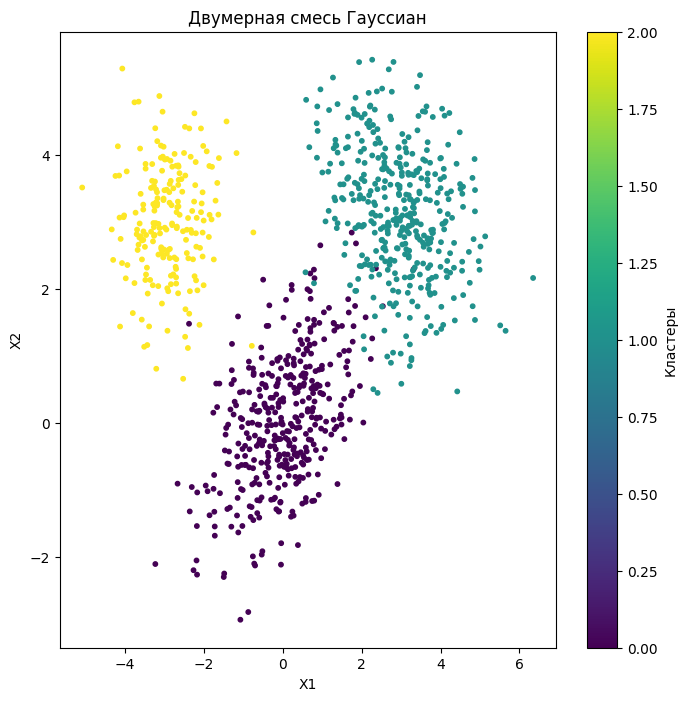

In [ ]:
np.random.seed(42)
n_samples = 1000
means = [[0, 0], [3, 3], [-3, 3]]
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.4], [-0.4, 1]], [[0.5, 0], [0, 0.75]]]
weights = [0.4, 0.4, 0.2]

X = np.zeros((n_samples, 2))
labels = np.zeros(n_samples, dtype=int)
current = 0

for i, (mean, cov, weight) in enumerate(zip(means, covariances, weights)):
    n_cluster_samples = int(n_samples * weight)
    X[current : current + n_cluster_samples, :] = np.random.multivariate_normal(mean, cov, n_cluster_samples)
    labels[current : current + n_cluster_samples] = i
    current += n_cluster_samples

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.title("Двумерная смесь Гауссиан")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Кластеры")
plt.show()

### **Задание 1 [1 Балл]**
Заиспользуйте метод K-Means для кластеризации полученной смесси Гауссовских распределений. Подберите гиперпараметр K максимизируя метрику индекс Силуэта (Silhouette Coefficient).

Для реализации данного задания используем библиотеку sklearn, переберем значения от 2 до 8, произведем кластеризацию и сохраним значение K, при котором индекс Силуэта будет наибольшим. Мы также можем отследить точность кластеризации по полученным графикам:

Best score 0.91, K = 3


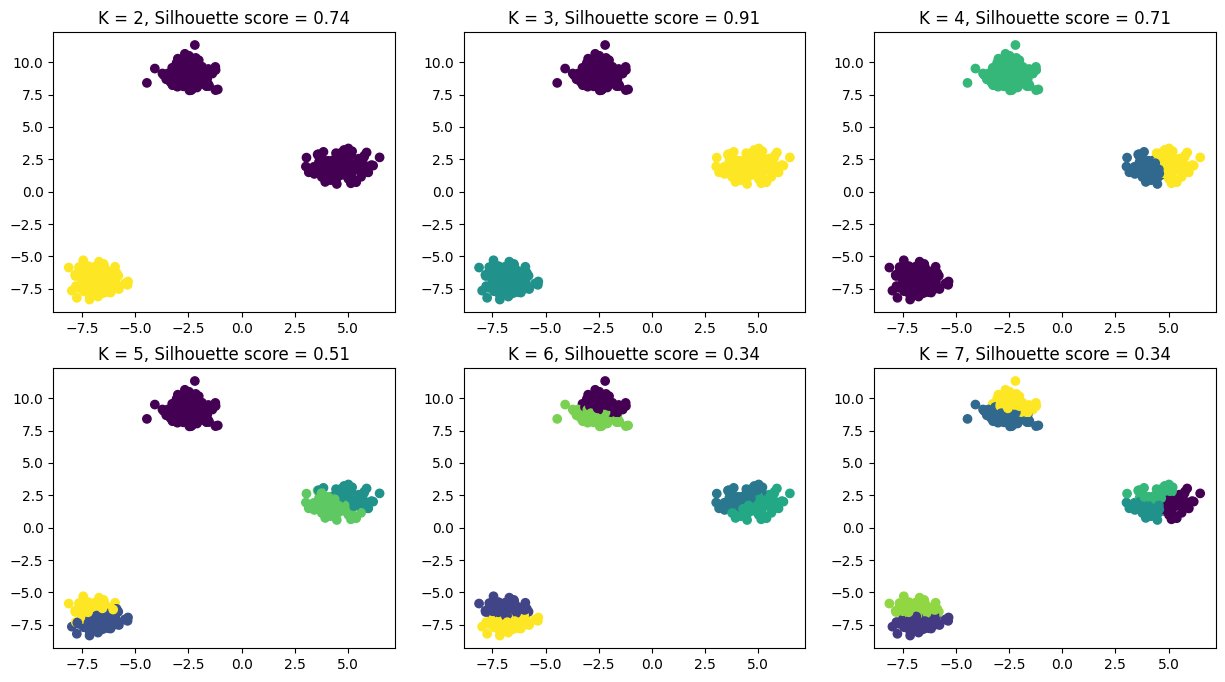

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


plt.figure(figsize= (15,8))
best_K, best_score = None, -1
for K in range(2,8):
    k_means = KMeans(n_clusters = K)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)

    score = np.round(silhouette_score(X=X, labels=clusters), 2)
    if score > best_score:
      best_score = score
      best_K = K

    plt.subplot(2,3,K - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title(f'K = {K}, Silhouette score = {score}')

print('Best score {}, K = {}'.format(best_score, best_K))
plt.show()

### **Задание 2 [1 Балл]**
Заиспользуйте метод DBSCAN для кластеризации полученной смесси Гауссовских распределений. Подберите гиперпараметры eps, min_samples максимизируя метрику BCubed (золотой стандарт записан в переменной labels).

Сначала реализуем функцию получения цветом (понадобится для удобной визуализации). Нам необходимо оценить, сколько элементов из полученного кластера определены верно (precision) и сколько элементов из "золотого" кластера попали в полученный кластер (recall). Для этого реализуем функцию расчета метрики BCubed, она будет возвращать точность и полноту предсказания.

In [ ]:
def get_colors(clusters):
    n_clusters = len(np.unique(clusters[clusters != -1]))

    palette = plt.colormaps['viridis'].resampled(n_clusters)(np.linspace(0, 1, n_clusters))
    colors = np.zeros((clusters.shape[0], 4))
    colors[clusters != -1] = palette[clusters[clusters != -1]]

    colors[clusters == -1] = [0.5, 0.5, 0.5, 0.3]

    return colors

def bcubed_precision_recall(true_labels, predicted_labels):
    n = len(true_labels)
    precision_sum = 0
    recall_sum = 0

    for i in range(n):
        same_predicted = np.where(predicted_labels == predicted_labels[i])[0]
        same_true = np.where(true_labels == true_labels[i])[0]

        precision = len(set(same_predicted) & set(same_true)) / len(same_predicted)
        recall = len(set(same_predicted) & set(same_true)) / len(same_true)

        precision_sum += precision
        recall_sum += recall

    precision = precision_sum / n
    recall = recall_sum / n
    return precision, recall

Далее перейдем непосредственно к перебору значений гиперпараметров. Кроме прочего используем явно неподходящие значения и посмотрим, как они влияют на работу кластеризатора:

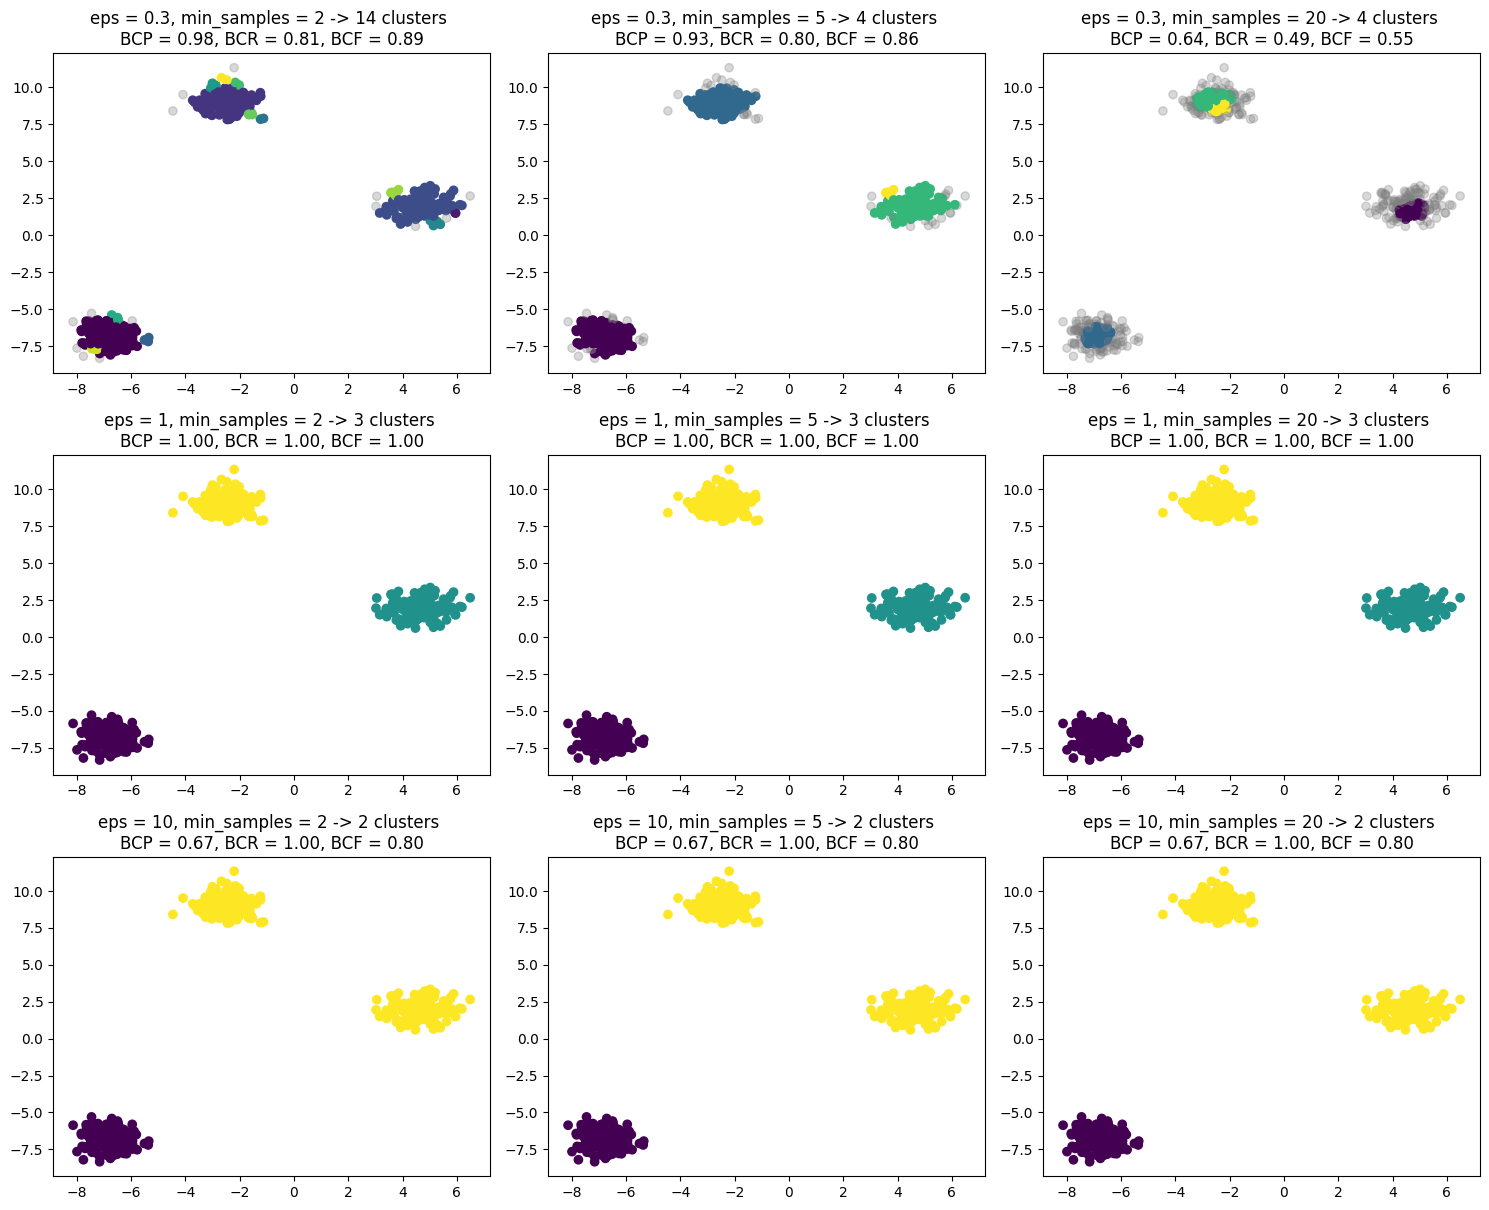

Best score 1.0, eps = 1, min_samples = 2


In [ ]:
from sklearn.cluster import DBSCAN


plt.figure(figsize= (15,20))
i = 1
eps_ = [0.3, 1, 10]
samples_ = [2, 5, 20]
best_BCF, best_eps, best_min_samples = -1, None, None
for e in eps_:
    for samples in samples_:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)

        BCP, BCR = bcubed_precision_recall(labels, clusters)
        BCF = (2 * BCP * BCR) / (BCP + BCR)

        if BCF > best_BCF:
            best_BCF = BCF
            best_eps = e
            best_min_samples = samples

        n_clusters = len(np.unique(clusters[clusters != -1]))
        colors = get_colors(clusters)
        plt.subplot(5, 3, i)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.title(f'eps = {e}, min_samples = {samples} -> {n_clusters} clusters \nBCP = {BCP:.2f}, BCR = {BCR:.2f}, BCF = {BCF:.2f}')
        i += 1

plt.tight_layout()
plt.show()
print('Best score {}, eps = {}, min_samples = {}'.format(best_BCF, best_eps, best_min_samples))

Попробуем также вычислить более точное значение, перебрав больше приближенных друг к другу значений без визуализации:

In [ ]:
eps_ = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]
samples_ = [2, 5, 8, 11, 14, 17, 20]
best_BCF, best_eps, best_min_samples = -1, None, None
for e in eps_:
    for samples in samples_:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)

        BCP, BCR = bcubed_precision_recall(labels, clusters)
        BCF = (2 * BCP * BCR) / (BCP + BCR)

        if BCF > best_BCF:
            best_BCF = BCF
            best_eps = e
            best_min_samples = samples

print('Best score {}, eps = {}, min_samples = {}'.format(best_BCF, best_eps, best_min_samples))

Best score 1.0, eps = 1.1, min_samples = 2


### **Задание 3 [2 Балл]**
Реализуйте EM алгоритм для кластеризации смеси Гауссовских смесей. Попробуйте его применить для кластеризации. Распишите, что делает E и M шаги в коде комментариями. Напишите краткий отчет, какой из алгоритмов кластеризации сработал лучше всего на сгенерированных данных.

EM алгоритм для разделения смеси Гауссовских распределений:

$$
p(X, Z|\pi, \mu, \Sigma) = \prod_{i=1}^\ell \prod_{k=1}^K \Big[\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \Big]^{z_ik}
$$

Соответственно, Е-шаг:

$$
g_{ik} := p\big(z_{ik} = 1\big|x_i, \pi, \mu, \Sigma\big) = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{s=1}^K \pi_s \mathcal{N}(x_i | \mu_s, \Sigma_s)}
$$

И М-шаг:

$$
\pi_k = \frac{1}{\ell} \sum_{i=1}^\ell g_{ik} \quad\quad \mu_k = \frac{1}{\ell \pi_k} \sum_{i=1}^\ell g_{ik} x_i
$$

$$
\Sigma_k = \frac{1}{\ell \pi_k} \sum_{i=1}^\ell g_{ik} (x_i - \mu_k) (x_i - \mu_k)^T
$$

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def p_multivariate(x, mean, cov):
    """
    Плотность многомерного нормального распределения
    """
    return multivariate_normal.pdf(x, mean=mean, cov=cov)

def Expectation_multivariate(X, Theta):
    """
    E-шаг: рассчитывает апостериорные вероятности
    """
    m, k = X.shape[0], len(Theta['weights'])
    Z = np.zeros((m, k))

    for i in range(m):
        for j in range(k):
            num = Theta['weights'][j] * p_multivariate(X[i], Theta['means'][j], Theta['covs'][j])
            denom = sum(Theta['weights'][s] * p_multivariate(X[i], Theta['means'][s], Theta['covs'][s]) for s in range(k))
            Z[i, j] = num / denom
    return Z

def Maximization_multivariate(X, G):
    """
    M-шаг: обновляет параметры смеси
    """
    m, n = X.shape
    k = G.shape[1]
    weights = np.sum(G, axis=0) / m
    means = []
    covs = []

    for j in range(k):
        w_j = G[:, j]
        mean_j = np.sum(w_j[:, np.newaxis] * X, axis=0) / np.sum(w_j)
        cov_j = np.zeros((n, n))
        for i in range(m):
            diff = (X[i] - mean_j).reshape(-1, 1)
            cov_j += w_j[i] * (diff @ diff.T)
        cov_j /= np.sum(w_j)
        means.append(mean_j)
        covs.append(cov_j)

    return {'weights': weights, 'means': means, 'covs': covs}

def MatrixDiff(Z1, Z2, delta):
    """
    Проверяет разницу между матрицами вероятностей
    """
    return np.max(abs(Z1 - Z2)) <= delta

def EM_multivariate(X, k, delta=1e-4, max_iters=100):
    """
    Основной алгоритм
    """
    m, n = X.shape
    np.random.seed(42)
    Theta = {
        'weights': np.ones(k) / k,
        'means': [X[np.random.choice(range(m))] for _ in range(k)],
        'covs': [np.cov(X.T) for _ in range(k)]
    }
    Z_prev = np.zeros((m, k))

    for iteration in range(max_iters):
        # E-шаг
        Z_new = Expectation_multivariate(X, Theta)
        # M-шаг
        Theta = Maximization_multivariate(X, Z_new)
        # Проверяем на сходимость
        if MatrixDiff(Z_new, Z_prev, delta):
            print(f"Сошлось за {iteration} итераций.")
            break
        Z_prev = Z_new
    else:
        print("Не сошлось за максимальное число итераций.")

    return Theta

Сошлось за 24 итераций.


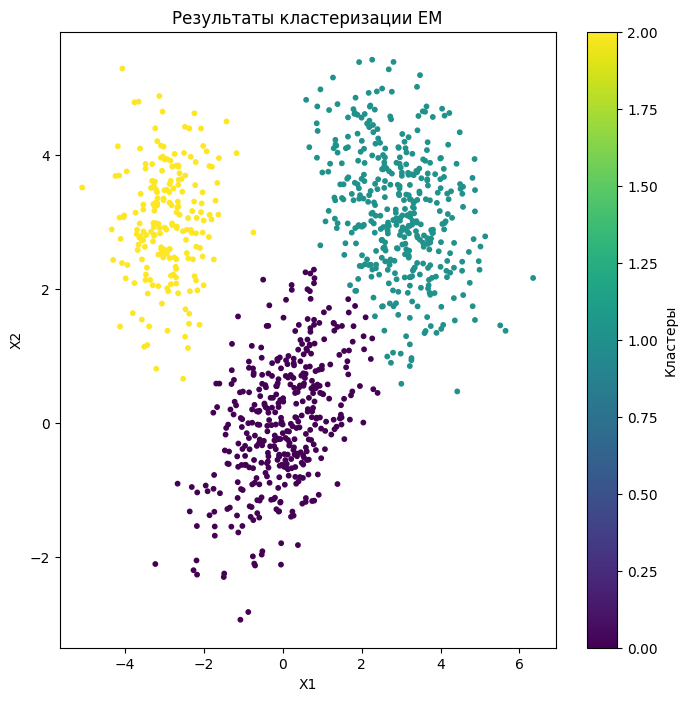

In [ ]:
k = 3
delta = 1e-4
Theta = EM_multivariate(X, k, delta)

Z_final = Expectation_multivariate(X, Theta)
clusters = np.argmax(Z_final, axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Результаты кластеризации EM")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Кластеры")
plt.show()